In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Features and labels loaded successfully!


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:56:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Train Accuracy: 0.99
Test Accuracy: 0.92

Train Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2089
           1       0.99      0.99      0.99      2331
           2       1.00      1.00      1.00      2044
           3       0.99      0.99      0.99      2140
           4       1.00      1.00      1.00      2289
           5       0.99      0.99      0.99      1920
           6       1.00      1.00      1.00      2113
           7       0.99      0.99      0.99      2337
           8       0.99      0.98      0.99      2224
           9       1.00      1.00      1.00      2117

    accuracy                           0.99     21604
   macro avg       0.99      0.99      0.99     21604
weighted avg       0.99      0.99      0.99     21604


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       369
           1       0.93

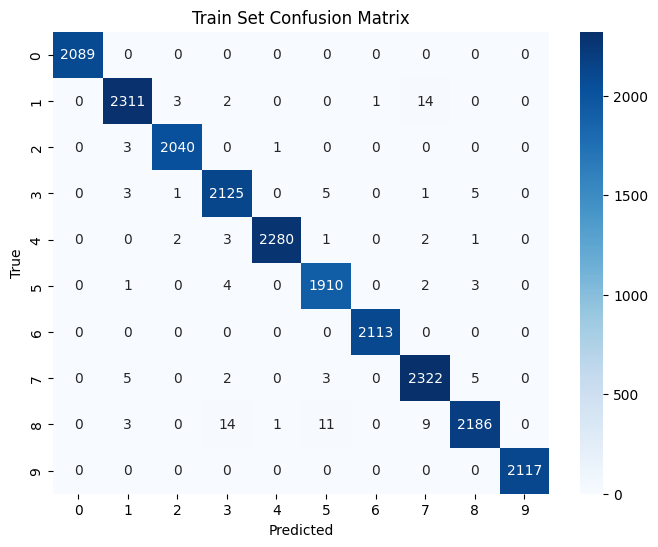


Test Set Confusion Matrix:


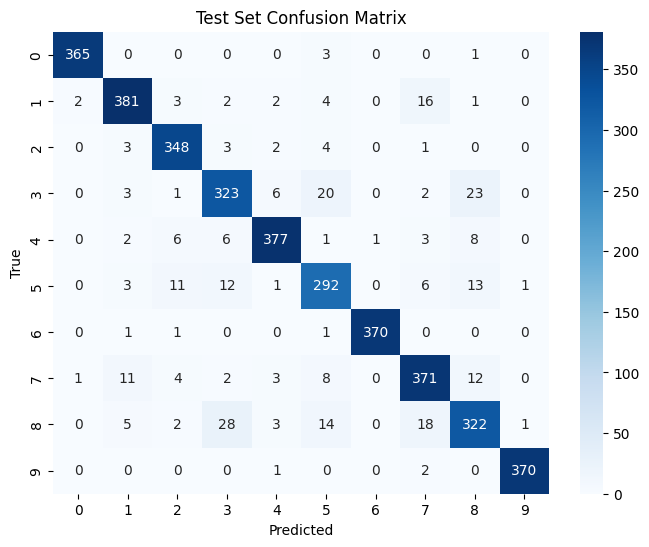

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to load the saved features and labels
inception_train_features_path = '/content/drive/My Drive/Final DataSet/inception_train_features.npy'
inception_test_features_path = '/content/drive/My Drive/Final DataSet/inception_test_features.npy'
train_labels_path = '/content/drive/My Drive/Final DataSet/train_labels.npy'
test_labels_path = '/content/drive/My Drive/Final DataSet/test_labels.npy'

# Load the pre-extracted features and labels
X_train = np.load(inception_train_features_path)
X_test = np.load(inception_test_features_path)
y_train = np.load(train_labels_path)
y_test = np.load(test_labels_path)

print("Features and labels loaded successfully!")

# Define individual classifiers
xgb_model = XGBClassifier(
    n_estimators=100,        # Number of trees
    learning_rate=0.1,       # Learning rate
    max_depth=6,             # Maximum depth of trees
    random_state=42,         # Random seed
    use_label_encoder=False, # Suppress warnings
    eval_metric='logloss'    # Evaluation metric
)

svm_model = SVC(
    probability=True,        # Required for VotingClassifier
    kernel='rbf',            # RBF kernel
    C=1.0,                   # Regularization parameter
    random_state=42          # Random seed
)

# Combine XGBoost and SVM into a Voting Classifier
voting_model = VotingClassifier(
    estimators=[('xgb', xgb_model), ('svm', svm_model)],
    voting='soft'            # Soft voting averages the predicted probabilities
)

# Train the VotingClassifier
voting_model.fit(X_train, y_train)

# Evaluate on train and test sets
y_train_pred = voting_model.predict(X_train)
y_test_pred = voting_model.predict(X_test)

# Print performance metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\nTrain Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

print("\nTrain Set Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrices
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display Confusion Matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

print("\nTrain Set Confusion Matrix:")
plot_confusion_matrix(train_conf_matrix, "Train Set Confusion Matrix")

print("\nTest Set Confusion Matrix:")
plot_confusion_matrix(test_conf_matrix, "Test Set Confusion Matrix")
